In [84]:
import PIL.Image as Image
import PIL.ImageDraw as ImageDraw
import math
import random
import numpy as np
import os
import pandas as pd
from copy import copy
from Cindy_stimuli import *
from scipy.misc import imread
import pdb

In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
# a = PopoutGratings()
# a.create()

In [87]:
# b = PopoutCircles()
# b.create()

1

In [88]:
# python Cindy_demo.py --net res101 --dataset vg\
#                    --checksession 1 --checkepoch 20 --checkpoint 16193 \
#                    --cuda --stimuli gratings


In [89]:
conv1_feat = np.load('a.npy')

In [90]:
conv1_feat.shape

(1, 64, 150, 150)

In [91]:
single_item_width = 80 # hardcoding

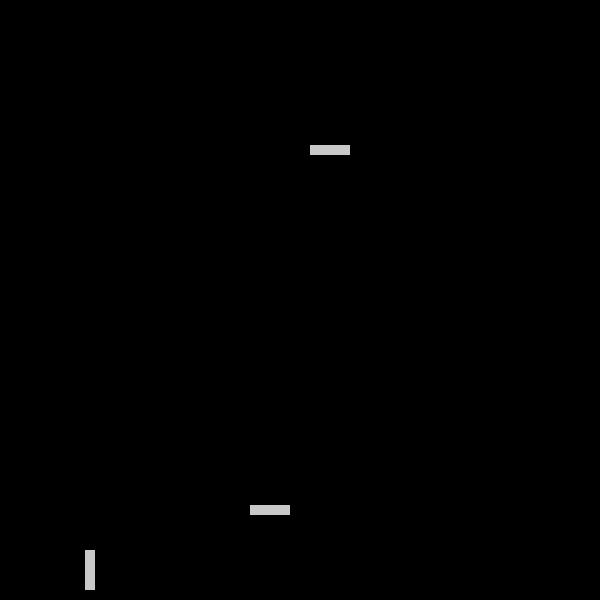

In [92]:
image = Image.open('images/gratings/0003.png')
image

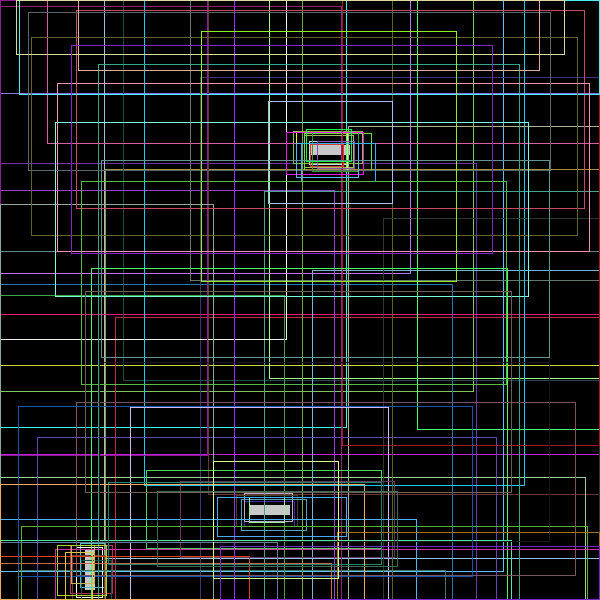

In [93]:
# my_rois = np.load('clutter_rois.npy') 
my_rois = np.load('my_rois.npy')
# my_rois = np.load('red_popout_rois.npy') 
# my_rois = np.load('red_popout_rois_1.npy')
# my_rois = np.load('grating_rois_1.npy')
# my_rois = np.load('popout_rois.npy') 
my_rois = my_rois[0,:,1:]
# first column of my_rois is all zero
# image = Image.new("RGB", (600, 800))
# image = Image.open('/om/user/xf15/NN/project/test_popout_green_circles_on_grid/cat09image0000.png')
# image = Image.open('/om/user/xf15/NN/project/test_colorful_circles_on_grid/cat09image0001.png')
# image = Image.open('/om/user/xf15/NN/project/test_colorful_circles/cat10image0000.png')
num_box = my_rois.shape[0] #300
num_candiate_box = 100 # hardcoding
min_rgb = 20
max_rgb = 256
# rs = np.arange(50, 256, (256-50)//(num_box/3)).astype(int)
# gs = np.arange(50, 256, (256-50)//(num_box/3)).astype(int)
# bs = np.arange(50, 256, (256-50)//(num_box/3)).astype(int)

# gs = np.repeat(0, num_box)
# bs = np.repeat(0, num_box)
image0 = copy(image)
draw0 = ImageDraw.Draw(image0)
# (100)
# (100,200)
# (200,num_box)
# (10)
for iB in range(num_candiate_box):
# for iB in range(num_small_rois-1):
#     draw1.rectangle(small_rois[iB, :], outline = (rs[iB], gs[iB], bs[iB]))
    draw0.rectangle(my_rois[iB, :], outline = (rs[iB], gs[iB], bs[iB]))
# image1.show()
# image1.save('temp.png')
image0

26


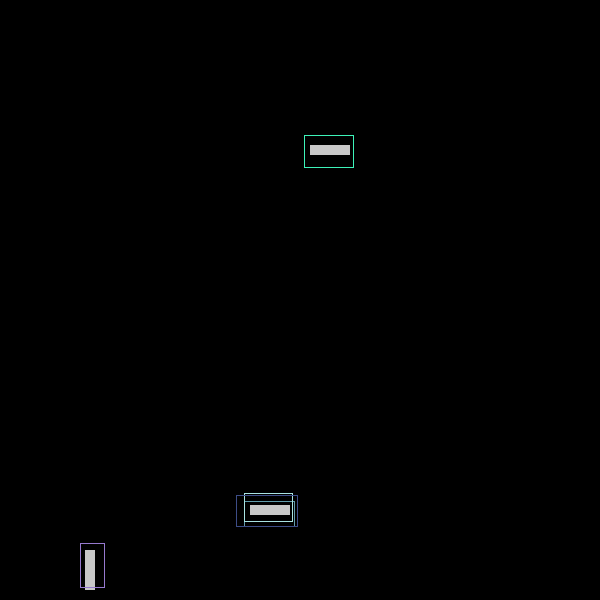

In [105]:
small_rois = np.ndarray((1,4), dtype="float32")
for iB in range(num_candiate_box):
    if my_rois[iB, 2] - my_rois[iB, 0] < single_item_width and my_rois[iB, 3] - my_rois[iB, 1] < 80:
        small_rois = np.vstack((small_rois, my_rois[iB, :]))
# small_rois = small_rois[1:,:]        
num_small_rois = small_rois.shape[0]
print(num_small_rois)
rs = (np.array(random.sample(range(min_rgb*10, max_rgb*10), num_box))/10).astype(int)
gs = (np.array(random.sample(range(min_rgb*10, max_rgb*10), num_box))/10).astype(int)
bs = (np.array(random.sample(range(min_rgb*10, max_rgb*10), num_box))/10).astype(int)
# rs = np.array(random.sample(range(min_rgb, max_rgb), num_small_rois))
# gs = np.array(random.sample(range(min_rgb, max_rgb), num_small_rois))
# bs = np.array(random.sample(range(min_rgb, max_rgb), num_small_rois))
# print(my_rois.shape)
# print(small_rois.shape)
# image0 = copy(image)
# draw0 = ImageDraw.Draw(image0)
# # (100)
# # (100,200)
# # (200,num_box)
# # (10)
# for iB in range(50):
# # for iB in range(num_small_rois-1):
# #     draw1.rectangle(small_rois[iB, :], outline = (rs[iB], gs[iB], bs[iB]))
#     draw0.rectangle(my_rois[iB, :], outline = (rs[iB], gs[iB], bs[iB]))
# # image1.show()
# # image1.save('temp.png')
# image0
image1 = copy(image)
draw1 = ImageDraw.Draw(image1)
# for iB in range(num_small_rois):
for iB in range(6):
    draw1.rectangle(small_rois[iB, :], outline = (rs[iB], gs[iB], bs[iB]))
#     draw1.rectangle(my_rois[iB, :], outline = (rs[iB], gs[iB], bs[iB]))
# image1.show()
# image1.save('temp.png')
image1
# image2 = copy(image)
# draw2 = ImageDraw.Draw(image2)
# # for iB in range(num_small_rois-1):
# # for iB in d:
# for iB in list(set(range(num_small_rois-1)) - set(d)):
#     draw2.rectangle(small_rois[iB, :], outline = (rs[iB], gs[iB], bs[iB]))
# # image2.show()
# # image2.save('temp.png')
# image2

[[3.03305054e+02 1.36928970e+02 3.57450562e+02 1.69964447e+02]
 [7.19829254e+01 5.49609314e+02 1.03635124e+02 5.94297363e+02]
 [2.43123016e+02 4.97426697e+02 2.95310425e+02 5.25482117e+02]
 [2.36942783e-38 2.36942783e-38 2.36942783e-38 2.36942783e-38]]


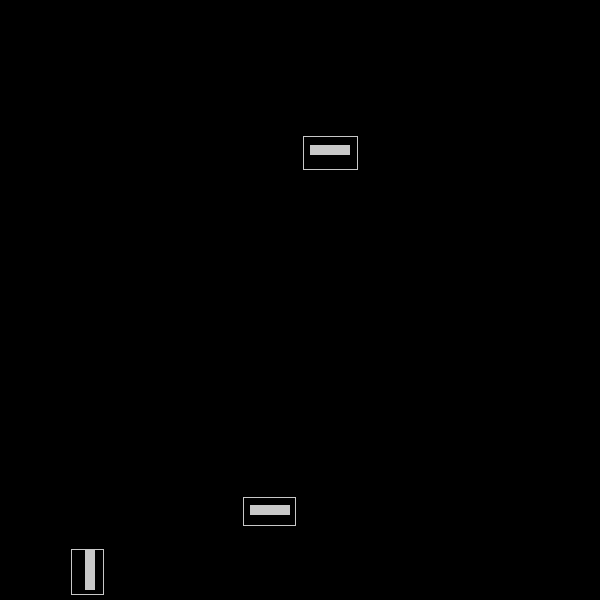

In [95]:
from sklearn.cluster import MeanShift
small_rois_centers = (small_rois[:, 0:2] + small_rois[:, 2:4])/2
clustering = MeanShift(bandwidth=single_item_width).fit(small_rois_centers)
num_clusters = len(set(clustering.labels_))
mean_clusterred_rois = np.zeros((num_clusters, 4), dtype = "float32")
for iC in range(num_clusters):
    mean_clusterred_rois[iC] = np.mean(small_rois[np.where(clustering.labels_ == iC)[0], :], axis=0)
print(mean_clusterred_rois)
image3 = copy(image)
draw3 = ImageDraw.Draw(image3)
for iB in mean_clusterred_rois:
#     print(iB)
    draw3.rectangle(iB, outline = (200,200,200))
image3

In [96]:
mean_clusterred_rois = np.concatenate((np.zeros((1, num_clusters)).T, mean_clusterred_rois), axis=1)
mean_clusterred_rois

array([[0.00000000e+00, 3.03305054e+02, 1.36928970e+02, 3.57450562e+02,
        1.69964447e+02],
       [0.00000000e+00, 7.19829254e+01, 5.49609314e+02, 1.03635124e+02,
        5.94297363e+02],
       [0.00000000e+00, 2.43123016e+02, 4.97426697e+02, 2.95310425e+02,
        5.25482117e+02],
       [0.00000000e+00, 2.36942783e-38, 2.36942783e-38, 2.36942783e-38,
        2.36942783e-38]])

In [97]:
c = b.sum(axis = 0)
d = np.where(c < 2)[0] 
# d = np.where(c < np.mean(c) - 2 * np.std(c))[0] # use mean and std

# print(b.shape)
# print(c.shape)
# print(d.shape)

print(np.mean(c))
print(np.std(c))

# import matplotlib.pyplot as plt
# plt.imshow(b);
# plt.colorbar()
# plt.show()
num_box
my_rois.shape

4.258706
1.9867015


(300, 4)

In [98]:
print(b.shape)
print(c.shape)
print(d.shape)

(76, 76)
(76,)
(11,)


In [99]:
def find_the_popout(X):
    X = mean_clusterred_rois
    num_items = X.shape[0]
    dists_matrix  = (np.sum(X**2, axis = 1) - 2 * X.dot(X.T)).T + np.sum(X**2, axis = 1)
    sum_dists_from_others = dists_matrix.sum(axis =0)
    popout_index = np.argmax(sum_dists_from_others)
    popout_rois = mean_clusterred_rois[popout_index, 1:5]
    return popout_rois

In [100]:
# import torch
# def find_the_popout(X):
#     X = torch.from_numpy(mean_clusterred_rois)
#     num_items = X.shape[0]
# #     dists_matrix  = (torch.sum(X**2, dim= 1) - 2 * X.mm(X.t())).t() + torch.sum(X**2, dim= 1)
#     dists_matrix  = (torch.sum(X**2, dim= 1) - 2 * torch.mm(X, X.t())).t() + torch.sum(X**2, dim= 1)
#     sum_dists_from_others = torch.sum(dists_matrix, dim =0)
#     popout_index = torch.max(sum_dists_from_others)
#     popout_rois = mean_clusterred_rois[popout_index, 1:5]
#     return popout_rois

In [101]:
my_feat = np.load('my_feat.npy')
popout_rois = find_the_popout(my_feat)

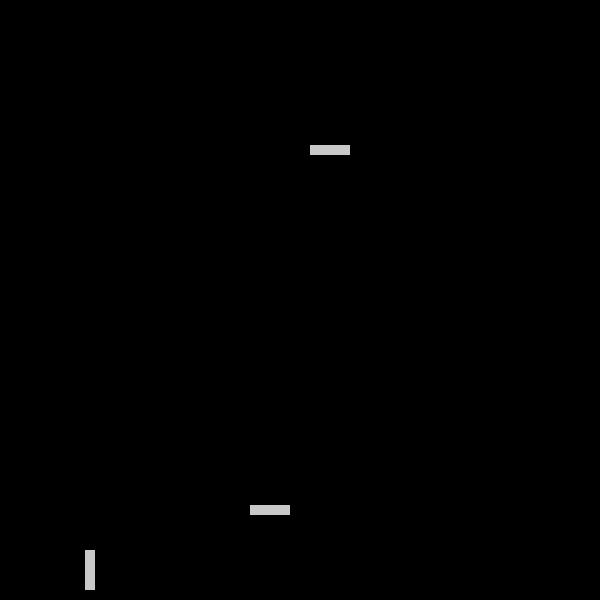

In [102]:
image4 = copy(image)
draw4 = ImageDraw.Draw(image4)
draw4.rectangle(np.float32(popout_rois), outline = (200,200,200))
image4

In [103]:
import matplotlib.pyplot as plt
plt.imshow(dists_matrix)
plt.colorbar()
plt.show()

NameError: name 'dists_matrix' is not defined

In [ ]:
X = my_feat
num_items = X.shape[0]
dists_matrix  = (np.sum(X**2, axis = 1) - 2 * X.dot(X.T)).T + np.sum(X**2, axis = 1)
sum_dists_from_others = dists_matrix.sum(axis =0)
popout_index = np.argmax(sum_dists_from_others)
popout_rois = X[popout_index, 1:5]


In [ ]:
popout_rois.dtype

In [ ]:
a =find_the_popout(mean_clusterred_rois)

In [ ]:
my_feat.shape

In [ ]:
small_rois[iB, :]

In [ ]:
feat_df = pd.DataFrame(my_feat.T, index = range(2048))
plt.figure() 
feat_df.plot(alpha=0.5)
plt.show()

In [ ]:
ts
df;

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

In [ ]:
plt.figure() 
df.plot()
plt.show()